<a href="https://colab.research.google.com/github/Fedryus/Ejercicios-IA/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [0]:
#Necesito una funcion para optimizarla con este procedimiento.

Ej: f(x,y)= $sin(x^2*1/2 - y^2*1/4 +3)cos(2x+1-e^y)$

In [0]:
func= lambda th: np.sin(1/2*th[0]**2 -1/4*th[1]**2 + 3)*np.cos(2*th[0]+1-np.e**th[1])

In [4]:
#Ejemplo de uso
func([1,4])

-0.11308909957791405

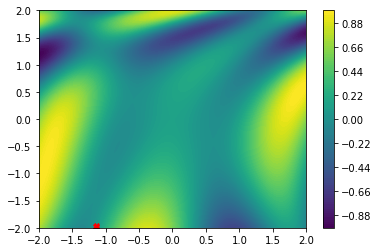

In [55]:
# CREAMOS EL NUESTRO ENTORNO 3D

resolution=100
_X= np.linspace(-2,2,resolution) #generame 100 valores (coordenadas) entre -2, 2 (nose porque entre -2 y 2, creo porque se ve mejor)

_Y= np.linspace(-2,2,resolution) 

_Z= np.zeros([100,100]) #Creo e inicializo la matriz Z con 0s

#y ahora la lleno:
for ix, x in enumerate(_X):
  for iy,y in enumerate(_Y):
    _Z[iy,ix]=func([x,y]) #los indices iy,ix son al reves puesto que las filas son como el eje Y y las columnas como el eje X

#Visualizacion desde arriba del entorno
plt.contourf(_X,_Y,_Z,100)
plt.colorbar()

# GENERAMOS UN PUNTO ALEATORIO
Theta= np.random.rand(2)*4-2 # *4-2 es porque la funcion devuelve entre 0 y -1 y nosotros tenemos que llevarlo a nuestra escala -2 y 2
plt.plot(Theta[0],Theta[1],"X",c="red")

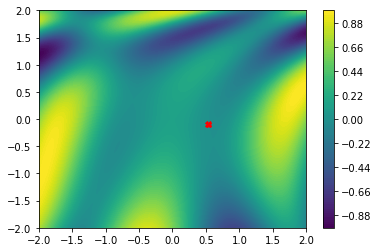

In [0]:
#Ahora toca el algoritmo...
#Para hallar las derivadas parciales de th[0] y th[1] voy a hacerlo mediante el metodo de aproximacion...
#Este metodo no es el mejor, ya que hay funciones mas precisas, pero por simplicidad del tutorial se resuelve así

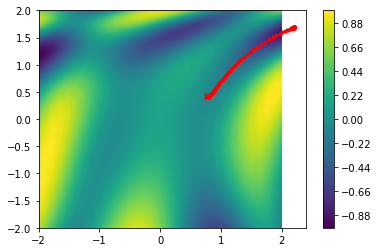

In [58]:
plt.contourf(_X,_Y,_Z,100)
plt.colorbar()
Theta= np.random.rand(2)*4-2 # *4-2 es porque la funcion devuelve entre 0 y -1 y nosotros tenemos que llevarlo a nuestra escala -2 y 2
plt.plot(Theta[0],Theta[1],"X",c="red")



_T= np.copy(Theta) #Copiamos el punto Theta ya que vamos a trabajar bastante con  el
h=0.001 #Este es el incremento para la derivada
gradiente=np.zeros([2]) #vector gradiente (como sabemos que tenemos solo dos derivadas parciales ya le agrego tam=2)
lr=0.001 #el learning rate que usaremos en el algoritmo

for _ in range(100000): #en este tutorial repetira el algoritmo 1000 veces
  for it,th in enumerate(Theta):
    _T=np.copy(Theta) #limpio el _T porque en cada iteracion lo modifico (ver prox linea)
    _T[it]= _T[it]+h #incremento un poquito uno de los elementos de theta
    derivada=(func(_T)-func(Theta))/h #Halla 1 derivada parcial (primero la de th0 luego en la prox iteracion la de th1)
    gradiente[it]=derivada

  Theta=Theta-lr*gradiente

  if(_%100==0):
    plt.plot(Theta[0],Theta[1],".",c="red")


plt.show()


In [0]:
#Importante: El algoritmo varía segun la cantidad de iteraciones (que se tuvieron que aumentar de 1000 a 10000 porque no alcanzaba) y por el lr